In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df_mlp = pd.read_csv("results_mlp.csv", sep=";")
df_rnn = pd.read_csv("results_rnn.csv", sep=";")
df_lstm = pd.read_csv("results_lstm.csv", sep=";")
df_transformer = pd.read_csv("results_transformer.csv", sep=";")

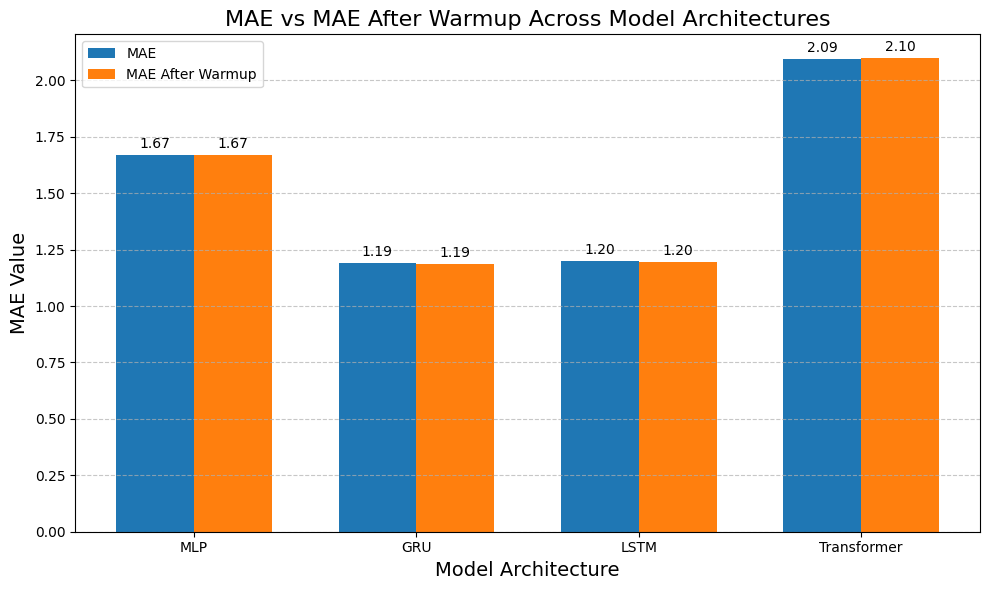

In [36]:
labels = ['MLP', 'GRU', 'LSTM', 'Transformer']
mae_means = [df['mae'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]
mae_warmup_means = [df['mae_warmup'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_means, width, label='MAE')
bars2 = ax.bar(x + width/2, mae_warmup_means, width, label='MAE After Warmup')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('MAE Value', fontsize=14)
ax.set_xlabel('Model Architecture', fontsize=14)
ax.set_title('MAE vs MAE After Warmup Across Model Architectures', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
df_mlp["source"] = "MLP"
df_rnn["source"] = "GRU"
df_lstm["source"] = "LSTM"
df_transformer["source"] = "Transformer"

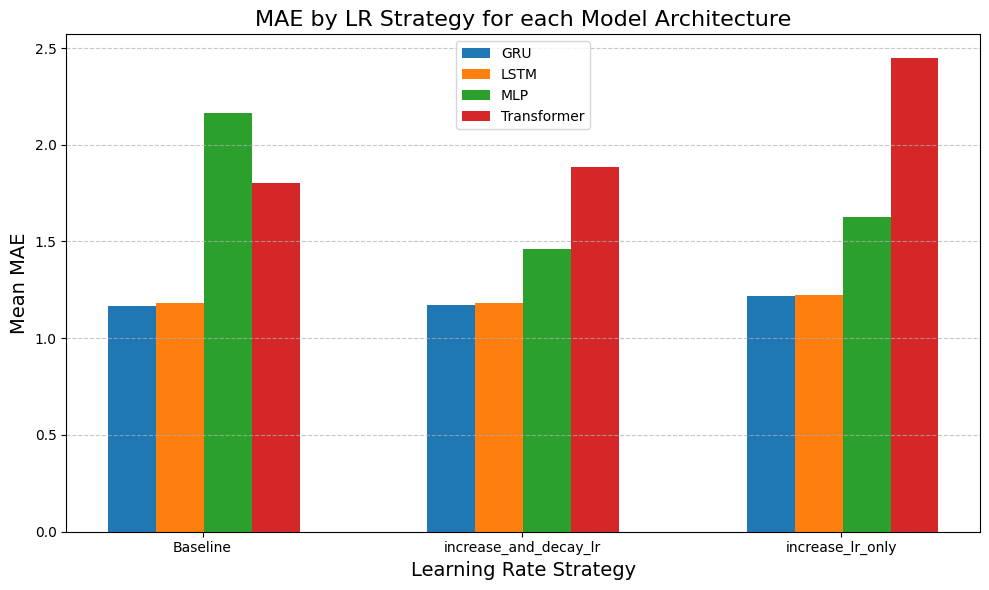

In [38]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['lr_strategy', 'source'])[['mae']].mean().reset_index()

# Plotting
strategies = grouped['lr_strategy'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Learning Rate Strategy', fontsize=14)
ax.set_title('MAE by LR Strategy for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

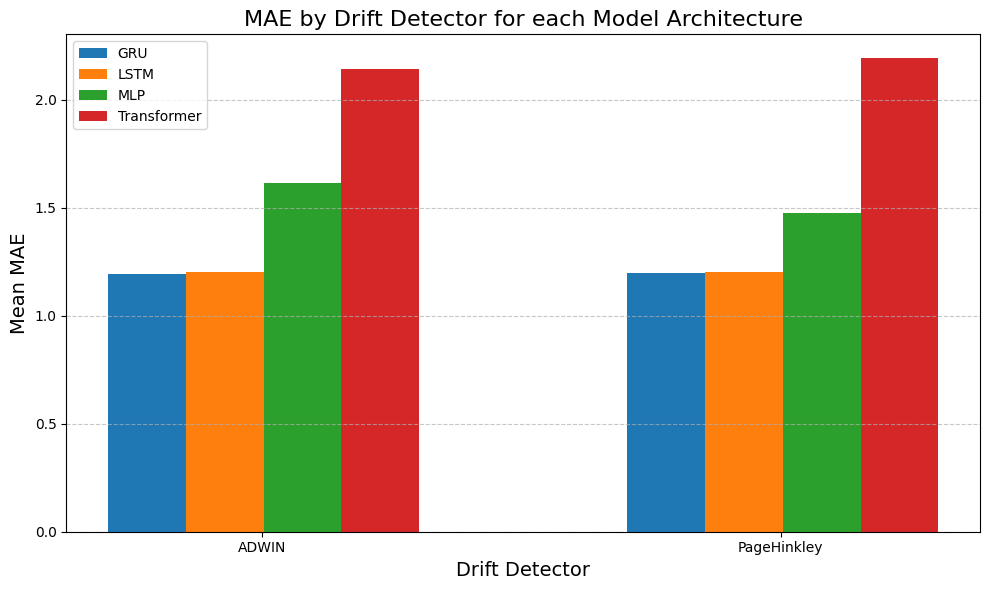

In [39]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['detector', 'source'])[['mae']].mean().reset_index()

strategies = grouped['detector'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Drift Detector', fontsize=14)
ax.set_title('MAE by Drift Detector for each Model Architecture', fontsize=16)
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

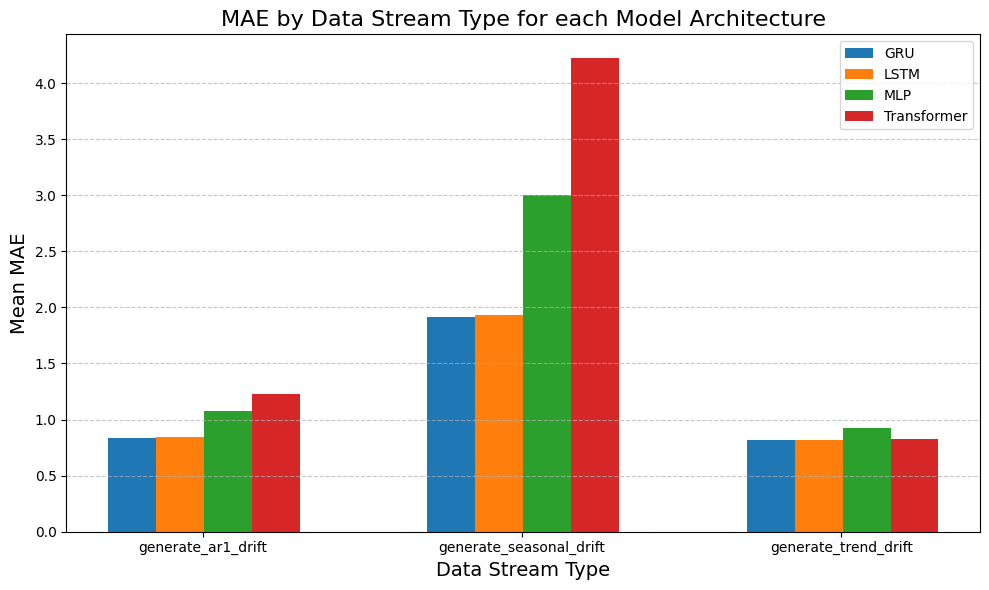

In [40]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['stream', 'source'])[['mae']].mean().reset_index()

strategies = grouped['stream'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Data Stream Type', fontsize=14)
ax.set_title('MAE by Data Stream Type for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

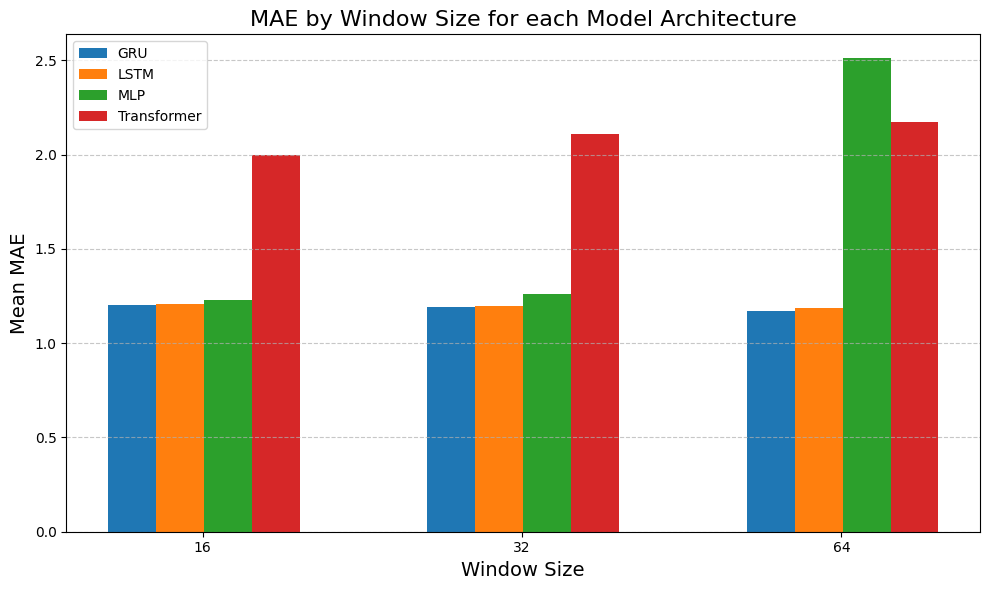

In [41]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['seq_len', 'source'])[['mae']].mean().reset_index()

strategies = grouped['seq_len'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Window Size', fontsize=14)
ax.set_title('MAE by Window Size for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

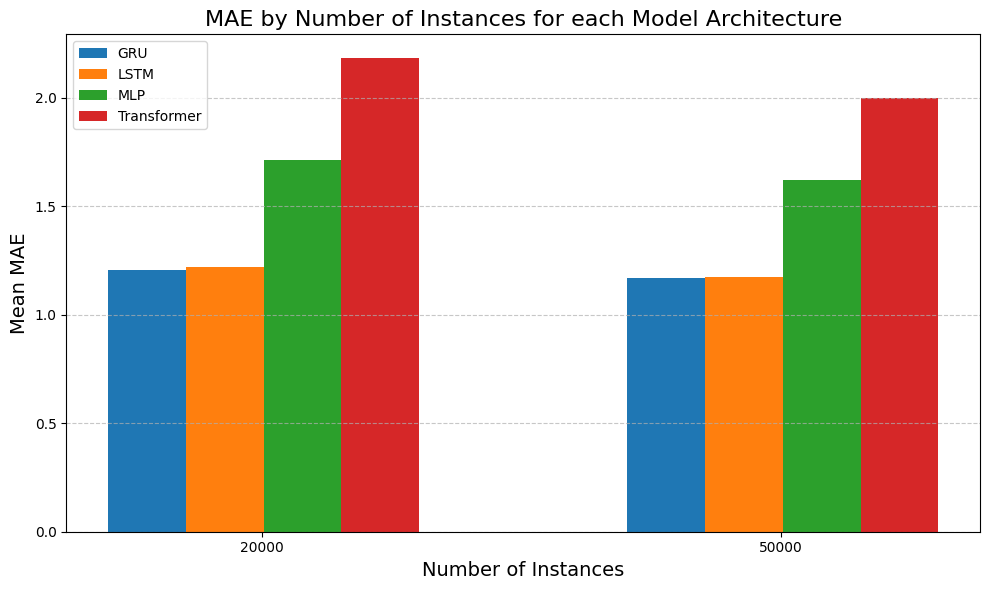

In [42]:
grouped = df_all.groupby(['nsamples', 'source'])[['mae']].mean().reset_index()

strategies = grouped['nsamples'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Number of Instances', fontsize=14)
ax.set_title('MAE by Number of Instances for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

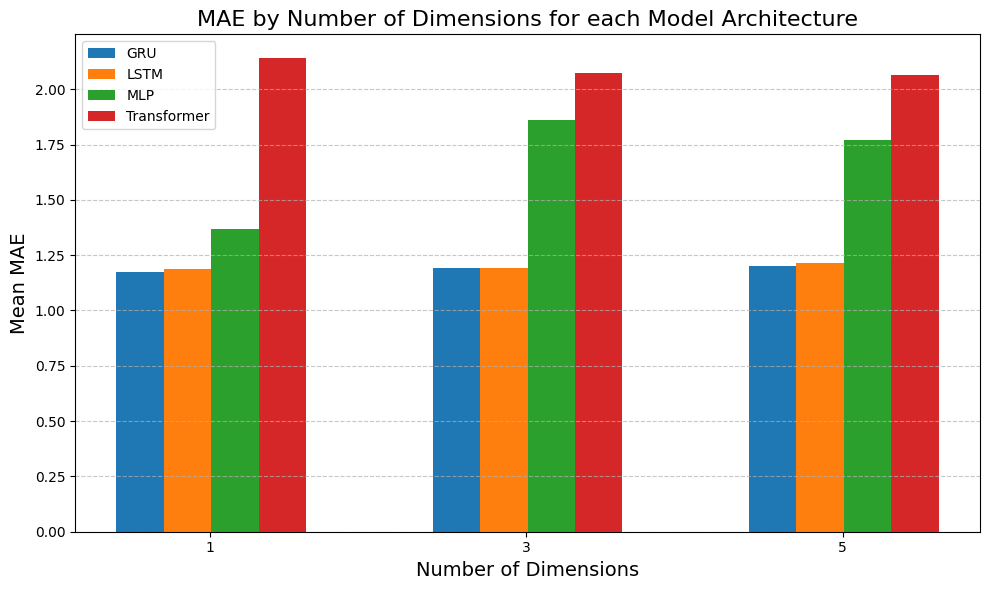

In [43]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['ndim', 'source'])[['mae']].mean().reset_index()

strategies = grouped['ndim'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Number of Dimensions', fontsize=14)
ax.set_title('MAE by Number of Dimensions for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# WF

In [44]:
df_mlp = pd.read_csv("wf_mlp.csv", sep=";")
df_rnn = pd.read_csv("wf_rnn.csv", sep=";")
df_lstm = pd.read_csv("wf_lstm.csv", sep=";")
df_transformer = pd.read_csv("wf_transformer.csv", sep=";")

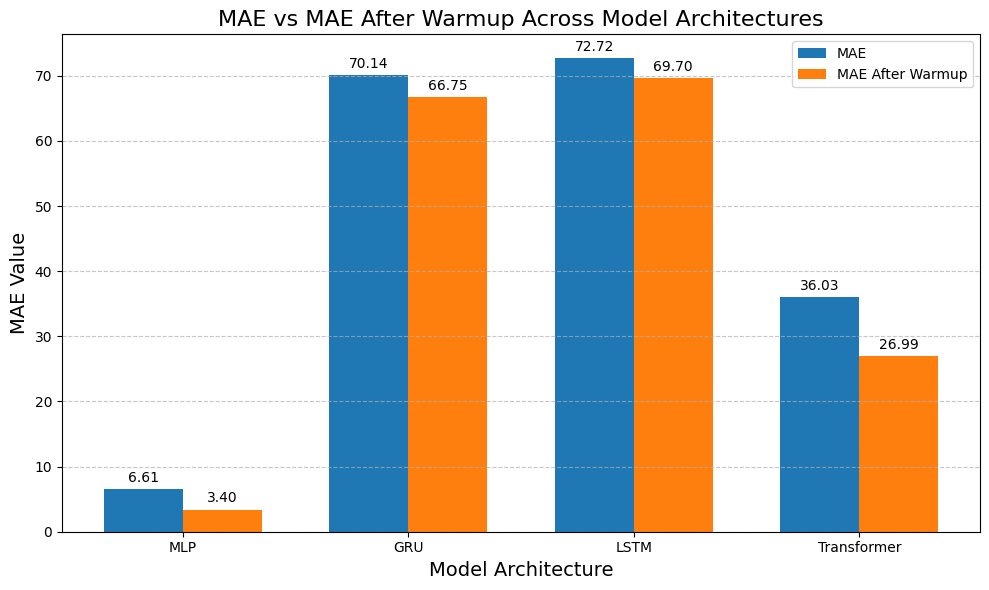

In [45]:
labels = ['MLP', 'GRU', 'LSTM', 'Transformer']
mae_means = [df['mae'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]
mae_warmup_means = [df['mae_warmup'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_means, width, label='MAE')
bars2 = ax.bar(x + width/2, mae_warmup_means, width, label='MAE After Warmup')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('MAE Value', fontsize=14)
ax.set_xlabel('Model Architecture', fontsize=14)
ax.set_title('MAE vs MAE After Warmup Across Model Architectures', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [25]:
df_mlp["source"] = "MLP"
df_rnn["source"] = "GRU"
df_lstm["source"] = "LSTM"
df_transformer["source"] = "Transformer"

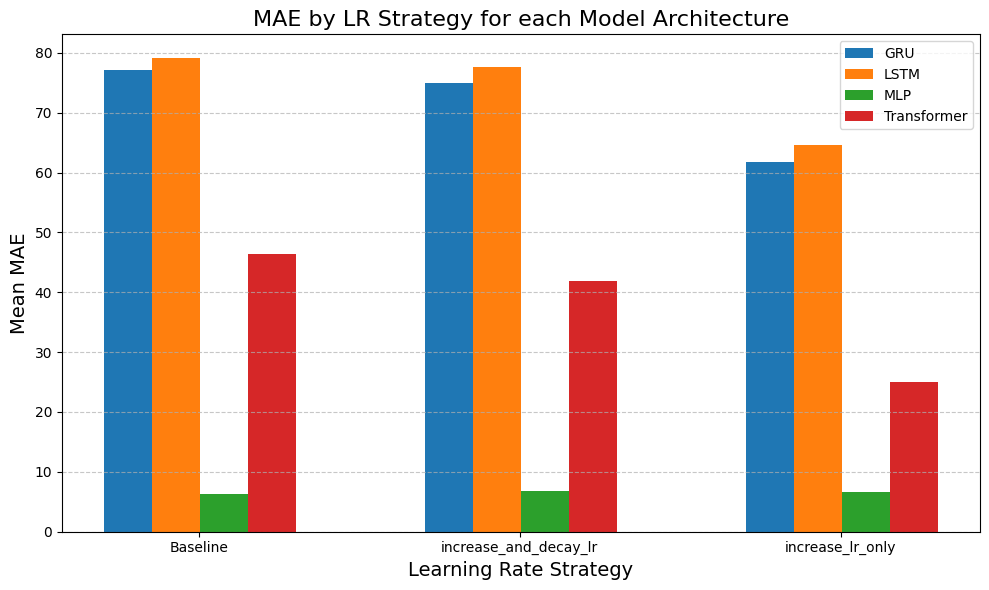

In [26]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['lr_strategy', 'source'])[['mae']].mean().reset_index()

# Plotting
strategies = grouped['lr_strategy'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Learning Rate Strategy', fontsize=14)
ax.set_title('MAE by LR Strategy for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

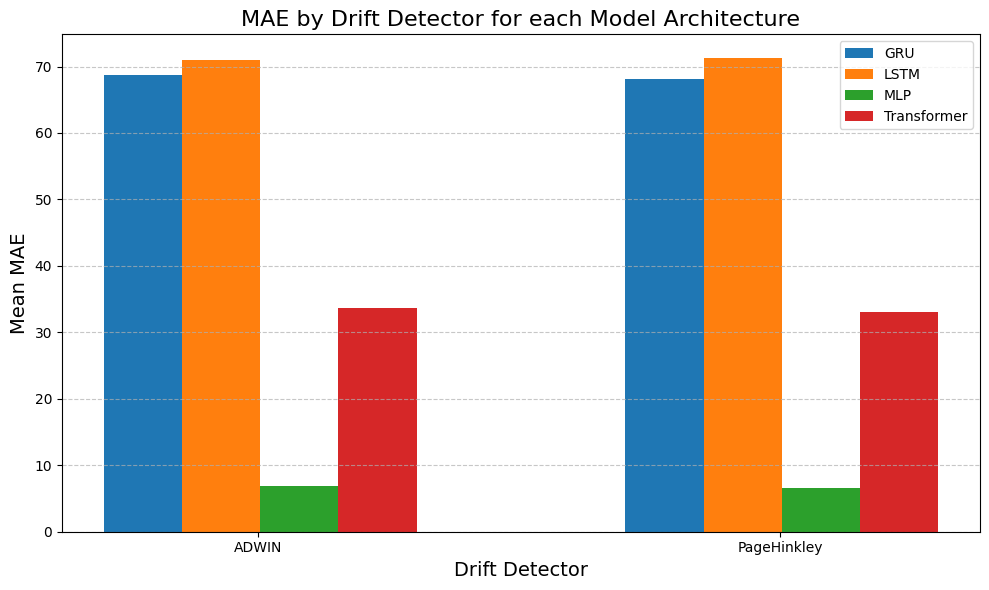

In [27]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['detector', 'source'])[['mae']].mean().reset_index()

strategies = grouped['detector'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Drift Detector', fontsize=14)
ax.set_title('MAE by Drift Detector for each Model Architecture', fontsize=16)
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

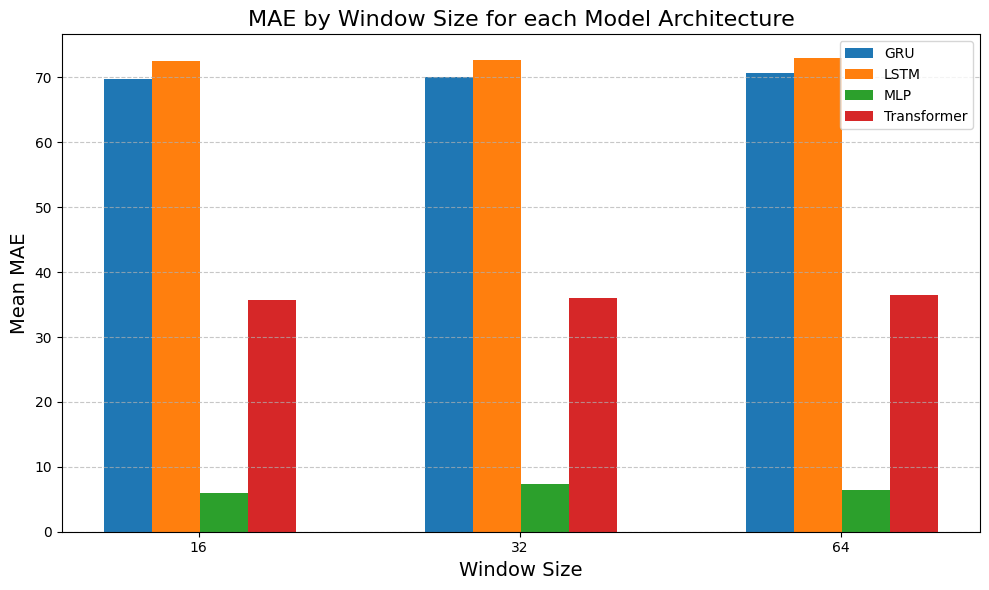

In [28]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['seq_len', 'source'])[['mae']].mean().reset_index()

strategies = grouped['seq_len'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Window Size', fontsize=14)
ax.set_title('MAE by Window Size for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Crypto

In [29]:
df_mlp = pd.read_csv("crypto_mlp.csv", sep=";")
df_rnn = pd.read_csv("crypto_rnn.csv", sep=";")
df_lstm = pd.read_csv("crypto_lstm.csv", sep=";")
df_transformer = pd.read_csv("crypto_transformer.csv", sep=";")

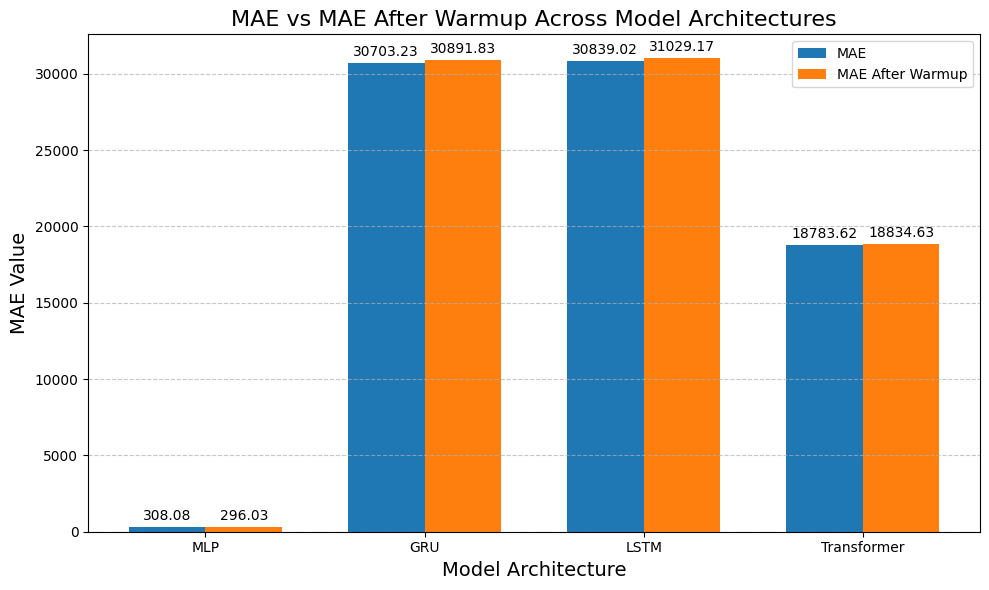

In [31]:
labels = ['MLP', 'GRU', 'LSTM', 'Transformer']
mae_means = [df['mae'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]
mae_warmup_means = [df['mae_warmup'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_means, width, label='MAE')
bars2 = ax.bar(x + width/2, mae_warmup_means, width, label='MAE After Warmup')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('MAE Value', fontsize=14)
ax.set_xlabel('Model Architecture', fontsize=14)
ax.set_title('MAE vs MAE After Warmup Across Model Architectures', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

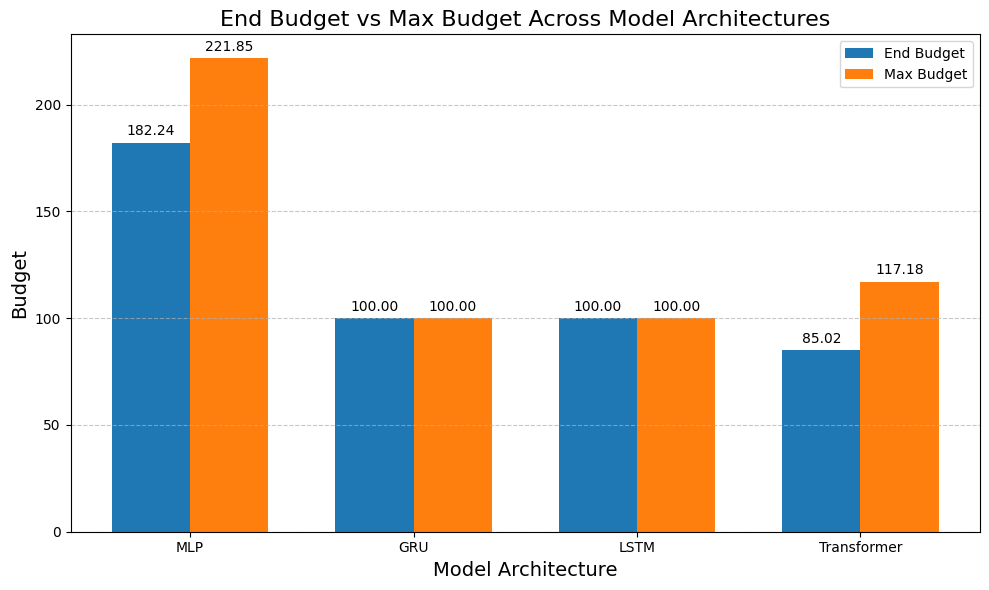

In [5]:
labels = ['MLP', 'GRU', 'LSTM', 'Transformer']
mae_means = [df['end_budget'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]
mae_warmup_means = [df['max_budget'].mean() for df in [df_mlp, df_rnn, df_lstm, df_transformer]]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_means, width, label='End Budget')
bars2 = ax.bar(x + width/2, mae_warmup_means, width, label='Max Budget')

# Add labels, title, and custom x-axis tick labels
ax.set_ylabel('Budget', fontsize=14)
ax.set_xlabel('Model Architecture', fontsize=14)
ax.set_title('End Budget vs Max Budget Across Model Architectures', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
df_mlp["source"] = "MLP"
df_rnn["source"] = "GRU"
df_lstm["source"] = "LSTM"
df_transformer["source"] = "Transformer"

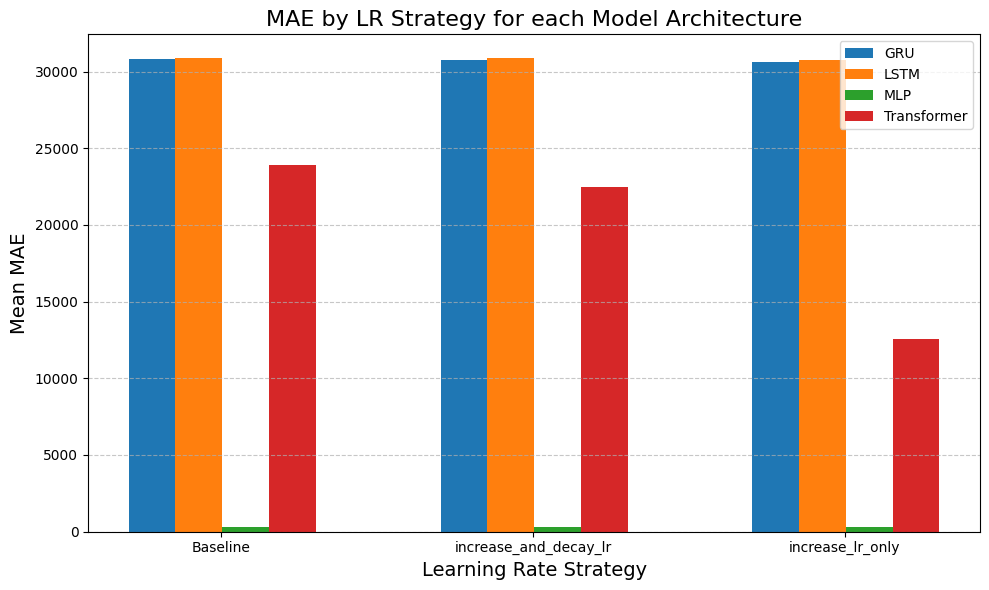

In [7]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['lr_strategy', 'source'])[['mae']].mean().reset_index()

# Plotting
strategies = grouped['lr_strategy'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Learning Rate Strategy', fontsize=14)
ax.set_title('MAE by LR Strategy for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

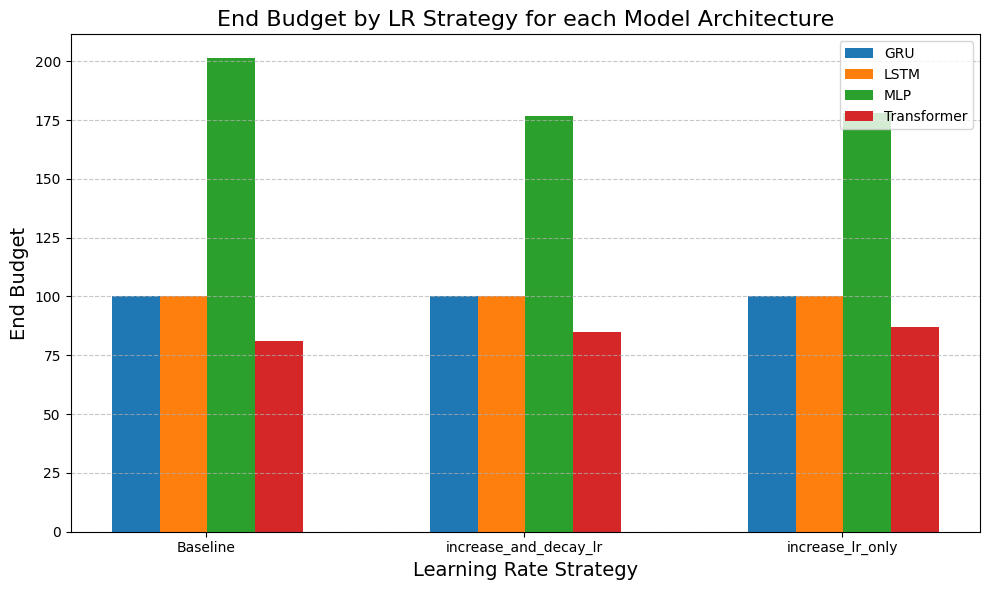

In [8]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['lr_strategy', 'source'])[['end_budget']].mean().reset_index()

# Plotting
strategies = grouped['lr_strategy'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['end_budget'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('End Budget', fontsize=14)
ax.set_xlabel('Learning Rate Strategy', fontsize=14)
ax.set_title('End Budget by LR Strategy for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

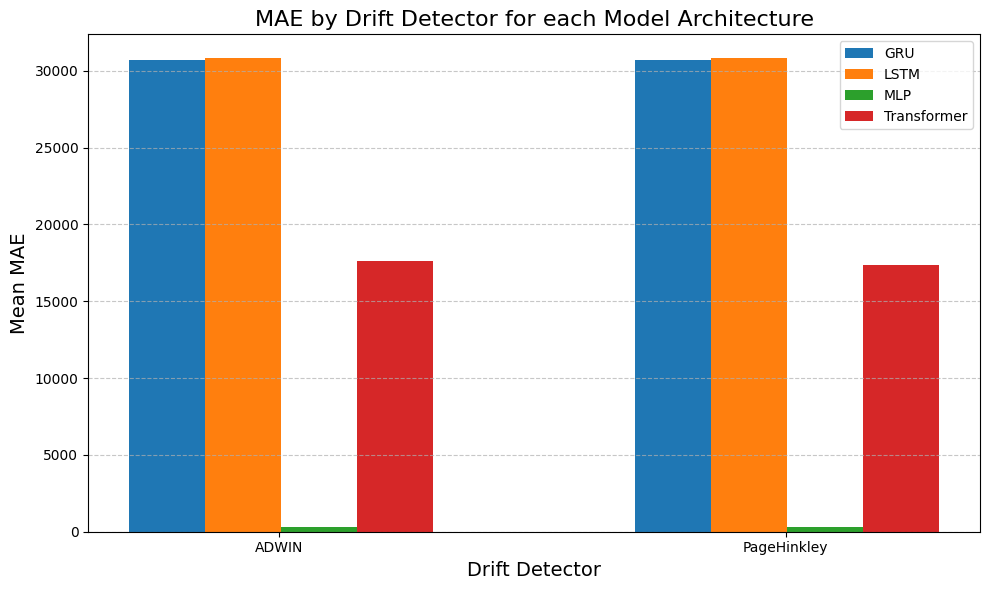

In [9]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['detector', 'source'])[['mae']].mean().reset_index()

strategies = grouped['detector'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Drift Detector', fontsize=14)
ax.set_title('MAE by Drift Detector for each Model Architecture', fontsize=16)
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

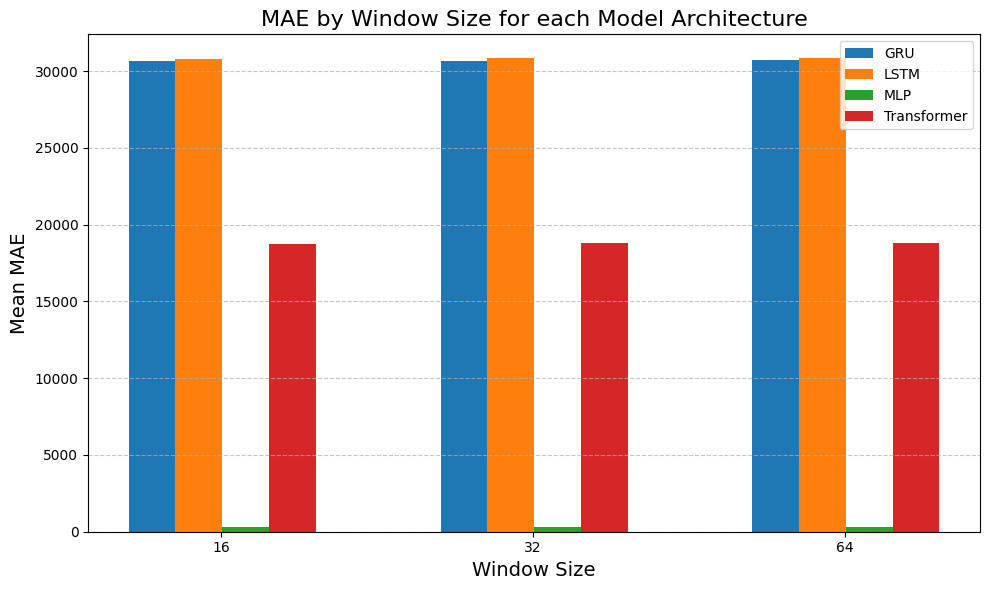

In [10]:
df_all = pd.concat([df_mlp, df_rnn, df_lstm, df_transformer], ignore_index=True)

grouped = df_all.groupby(['seq_len', 'source'])[['mae']].mean().reset_index()

strategies = grouped['seq_len'].unique()
sources = grouped['source'].unique()
x = np.arange(len(strategies))
width = 0.15  # Smaller width to fit multiple bars

fig, ax = plt.subplots(figsize=(10, 6))

for i, source in enumerate(sources):
    sub = grouped[grouped['source'] == source]
    bars = ax.bar(
        x + i * width - (len(sources) * width / 2.71),
        sub['mae'],
        width,
        label=f'{source}'
    )

ax.set_xticks(x)
ax.set_xticklabels(strategies)
ax.set_ylabel('Mean MAE', fontsize=14)
ax.set_xlabel('Window Size', fontsize=14)
ax.set_title('MAE by Window Size for each Model Architecture', fontsize=16)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()